[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


PART 1: Data Loading and Preprocessing
Creating sample dataset for demonstration...
Sample dataset created for demonstration.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10 non-null     object
 1   sentiment  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes
None

First few rows:
                                              review  sentiment
0  This movie was absolutely fantastic! I loved e...          1
1           Terrible movie. Waste of time and money.          0
2  The acting was superb and the story was engaging.          1
3         I hated this film. The plot made no sense.          0
4  One of the best movies I've seen this year! Hi...          1

Class Distribution:
sentiment
1    5
0    5
Name: count, dtype: int64

Preprocessing text...

Original vs Processed Text:

Original: This mo

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


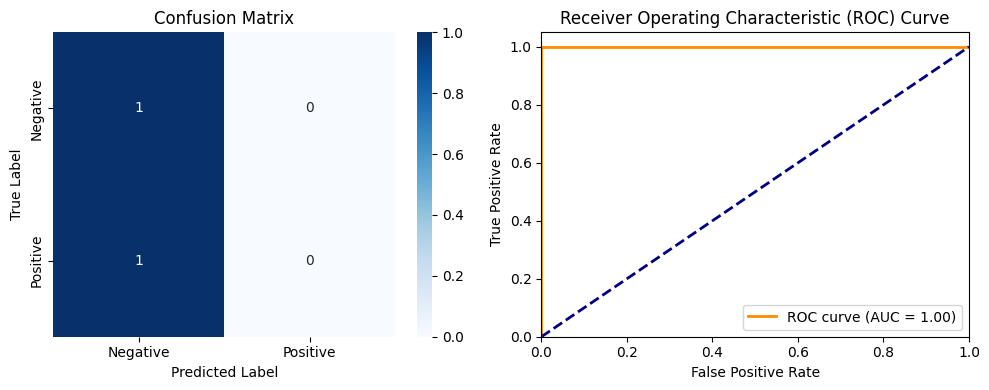


Top 10 Most Predictive Features (Positive Class)
year: 0.6229
seen: 0.6229
recommend: 0.6229
stori: 0.6229
superb: 0.6229
absolut: 0.6229
beauti: 0.6229
cinematographi: 0.6229
engag: 0.6229
minut: 0.6229


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt_tab')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

print("=" * 60)
print("PART 1: Data Loading and Preprocessing")
print("=" * 60)

try:

    df = pd.read_csv('imdb_reviews.csv')  # Adjust filename as needed
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except:
    print("Creating sample dataset for demonstration...")
    # Create a sample dataset if actual data isn't available
    sample_reviews = [
        "This movie was absolutely fantastic! I loved every minute of it.",
        "Terrible movie. Waste of time and money.",
        "The acting was superb and the story was engaging.",
        "I hated this film. The plot made no sense.",
        "One of the best movies I've seen this year! Highly recommended.",
        "Boring and predictable. Would not watch again.",
        "The cinematography was beautiful and the music was perfect.",
        "Awful acting and terrible direction. Disappointing.",
        "A masterpiece! The director did an excellent job.",
        "I fell asleep during this movie. So dull."
    ]
    sample_labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative
    df = pd.DataFrame({'review': sample_reviews, 'sentiment': sample_labels})
    print("Sample dataset created for demonstration.")

# Display dataset info
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Check class distribution
print("\nClass Distribution:")
print(df['sentiment'].value_counts())

# Text preprocessing function
def preprocess_text(text):
    """
    Preprocess text by:
    1. Converting to lowercase
    2. Removing non-alphabetic characters
    3. Removing stopwords
    4. Applying stemming
    """
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove stopwords and apply stemming
    processed_words = []
    for word in words:
        if word not in stop_words and len(word) > 2:  # Remove short words
            stemmed_word = stemmer.stem(word)
            processed_words.append(stemmed_word)

    return ' '.join(processed_words)

# Apply preprocessing
print("\nPreprocessing text...")
df['processed_review'] = df['review'].apply(preprocess_text)

# Show before and after
print("\nOriginal vs Processed Text:")
for i in range(3):
    print(f"\nOriginal: {df['review'].iloc[i][:100]}...")
    print(f"Processed: {df['processed_review'].iloc[i][:100]}...")

# ===== PART 1.2: Split the dataset =====

X = df['processed_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Train class distribution:\n{y_train.value_counts()}")
print(f"Test class distribution:\n{y_test.value_counts()}")

print("\n" + "=" * 60)
print("Implementing Bag-of-Words and Naive Bayes")
print("=" * 60)

vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 features
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")
print(f"Training features shape: {X_train_bow.shape}")
print(f"Testing features shape: {X_test_bow.shape}")

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

print("\nNaive Bayes classifier trained successfully!")


print("\n" + "=" * 60)
print("PART 2: Model Evaluation")
print("=" * 60)

# Make predictions
y_pred = nb_classifier.predict(X_test_bow)
y_pred_proba = nb_classifier.predict_proba(X_test_bow)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Display top predictive features
print("\n" + "=" * 60)
print("Top 10 Most Predictive Features (Positive Class)")
print("=" * 60)

feature_names = vectorizer.get_feature_names_out()
log_prob = nb_classifier.feature_log_prob_[1] - nb_classifier.feature_log_prob_[0]
top_indices = np.argsort(log_prob)[-10:][::-1]

for idx in top_indices:
    print(f"{feature_names[idx]}: {log_prob[idx]:.4f}")


PART 3: Model Evaluation

1. Model with ALL features:
Accuracy: 0.8900
Precision: 0.8545
Recall: 0.9400
F1-Score: 0.8952
ROC-AUC: 0.9304

Confusion Matrix (All Features):
[[42  8]
 [ 3 47]]

2. Model with SELECTED features only:
Accuracy: 0.8600
Precision: 0.8600
Recall: 0.8600
F1-Score: 0.8600
ROC-AUC: 0.9436

Confusion Matrix (Selected Features):
[[43  7]
 [ 7 43]]

Comparison: All Features vs Selected Features
   Metric  All Features  Selected Features  Difference
 Accuracy      0.890000             0.8600   -0.030000
Precision      0.854545             0.8600    0.005455
   Recall      0.940000             0.8600   -0.080000
 F1-Score      0.895238             0.8600   -0.035238
  ROC-AUC      0.930400             0.9436    0.013200

Alternative Comparison View:
Accuracy     All: 0.8900 | Selected: 0.8600 | Diff: -0.0300 ↓
Precision    All: 0.8545 | Selected: 0.8600 | Diff: +0.0055 ↑
Recall       All: 0.9400 | Selected: 0.8600 | Diff: -0.0800 ↓
F1-Score     All: 0.8952 | Selected:

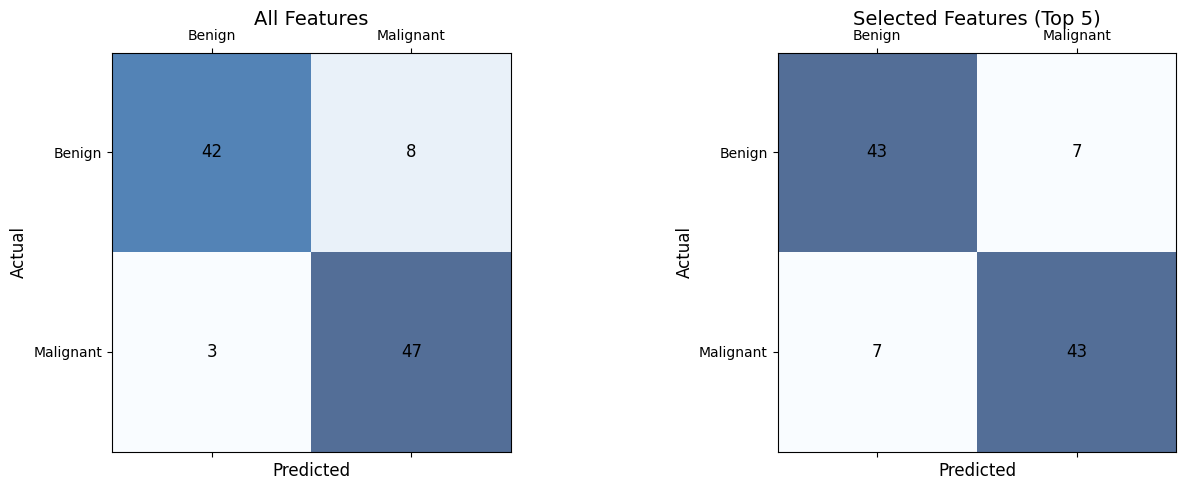

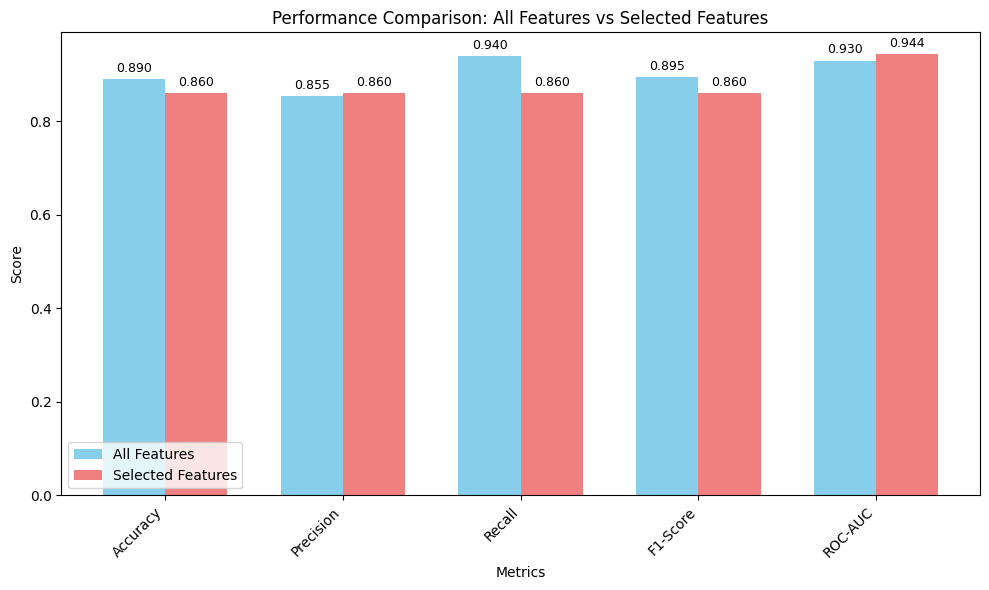

In [4]:

print("\n" + "=" * 60)
print("PART 3: Model Evaluation")
print("=" * 60)

# Function to train and evaluate model
def evaluate_model(X_train_data, X_test_data, y_train_data, y_test_data, model_name):
    """Train and evaluate a logistic regression model."""
    # Train model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_data, y_train_data)

    # Make predictions
    y_pred = model.predict(X_test_data)
    y_pred_proba = model.predict_proba(X_test_data)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred, zero_division=0)
    recall = recall_score(y_test_data, y_pred, zero_division=0)
    f1 = f1_score(y_test_data, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test_data, y_pred_proba)

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_data, y_pred)

    return metrics, cm, model

# Evaluate model with ALL features
print("\n1. Model with ALL features:")
all_metrics, all_cm, all_model = evaluate_model(
    X_train_scaled, X_test_scaled, y_train, y_test, "All Features"
)

for metric, value in all_metrics.items():
    print(f"{metric}: {value:.4f}")

print(f"\nConfusion Matrix (All Features):")
print(all_cm)

# Evaluate model with SELECTED features only
print("\n2. Model with SELECTED features only:")
# Select only the top 5 features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

selected_metrics, selected_cm, selected_model = evaluate_model(
    X_train_selected, X_test_selected, y_train, y_test, "Selected Features"
)

for metric, value in selected_metrics.items():
    print(f"{metric}: {value:.4f}")

print(f"\nConfusion Matrix (Selected Features):")
print(selected_cm)

# Compare models - FIXED VERSION
print("\n" + "=" * 60)
print("Comparison: All Features vs Selected Features")
print("=" * 60)

# Create comparison DataFrame properly
comparison_data = []
for key in all_metrics.keys():
    comparison_data.append({
        'Metric': key,
        'All Features': all_metrics[key],
        'Selected Features': selected_metrics[key],
        'Difference': selected_metrics[key] - all_metrics[key]
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Alternative display
print("\nAlternative Comparison View:")
for key in all_metrics.keys():
    diff = selected_metrics[key] - all_metrics[key]
    diff_symbol = "↑" if diff > 0 else "↓" if diff < 0 else "="
    print(f"{key:12} All: {all_metrics[key]:.4f} | Selected: {selected_metrics[key]:.4f} | Diff: {diff:+.4f} {diff_symbol}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrices
axes[0].matshow(all_cm, cmap='Blues', alpha=0.7)
for i in range(all_cm.shape[0]):
    for j in range(all_cm.shape[1]):
        axes[0].text(j, i, str(all_cm[i, j]), ha='center', va='center', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('All Features', fontsize=14, pad=20)
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Benign', 'Malignant'], fontsize=10)
axes[0].set_yticklabels(['Benign', 'Malignant'], fontsize=10)

axes[1].matshow(selected_cm, cmap='Blues', alpha=0.7)
for i in range(selected_cm.shape[0]):
    for j in range(selected_cm.shape[1]):
        axes[1].text(j, i, str(selected_cm[i, j]), ha='center', va='center', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('Selected Features (Top 5)', fontsize=14, pad=20)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Benign', 'Malignant'], fontsize=10)
axes[1].set_yticklabels(['Benign', 'Malignant'], fontsize=10)

plt.tight_layout()
plt.show()

# Bar chart comparison
metrics_names = list(all_metrics.keys())
all_values = [all_metrics[m] for m in metrics_names]
selected_values = [selected_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, all_values, width, label='All Features', color='skyblue')
bars2 = ax.bar(x + width/2, selected_values, width, label='Selected Features', color='lightcoral')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison: All Features vs Selected Features')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, rotation=45, ha='right')
ax.legend()

# Add value labels on bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()